# Bay Wheels Bike Sharing System
## by (Mohammed Khalil)

## Investigation Overview

Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area.

It is operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. Bay Wheels is 'the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. 

It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose.

In June 2017 the system was officially re-launched as Ford GoBike in a partnership with Ford Motor Company.

After Motivate's acquisition by Lyft, the system was renamed to Bay Wheels in June 2019. The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose.

## Dataset Overview

This document explores the Ford GoBike's trip data for public containing bike rides, The attributes included the trip start/end time, as well as additional measurements such as user type, gender and member age.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df['member_age']= 2021-df['member_birth_year']
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
df['start_time_day_of_week']= df['start_time'].dt.strftime('%a')
df['start_hour_of_day'] = df.start_time.dt.strftime('%H')
df['duration_hours']= df['duration_sec']/3600
weekdays = ['Mon','Tue','Wed','Thu','Fri', 'Sat', 'Sun']
ordered_weekdays = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)
df['start_time_day_of_week'] = df['start_time_day_of_week'].astype(ordered_weekdays)
default_color = sb.color_palette()[0]

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Bike Ride Duration (Hours)

#### It's seems that most data are below 1 hour.

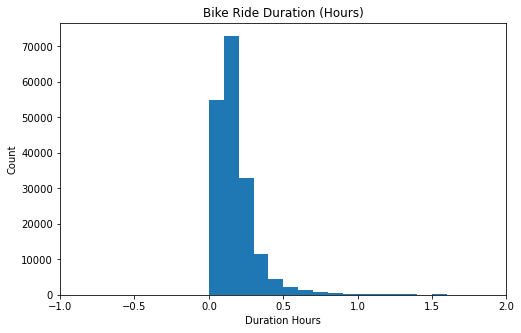

In [3]:
bins = np.arange(0, df['duration_hours'].max()+0.1, 0.1)
plt.figure(figsize=[8, 5])
plt.xlim(-1,2)
plt.xlabel('Duration Hours');
plt.ylabel('Count');
plt.title('Bike Ride Duration (Hours)')
plt.hist(data = df, x = 'duration_hours', bins=bins);

## Weekly usage comparison between customers and subscribers.

#### It seems like subscribers have a more weekly usage compared to customers.

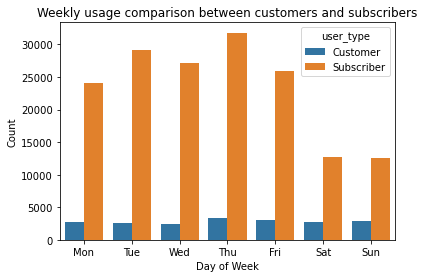

In [4]:
sb.countplot(data=df, x='start_time_day_of_week', hue='user_type');
plt.title('Weekly usage comparison between customers and subscribers')
plt.xlabel('Day of Week');
plt.ylabel('Count');

## Avgerage Trip Duration in Hours (Customer/Subscriber)

#### It seems like subscribers ride much shorter trips compared to customers on each day of the week.

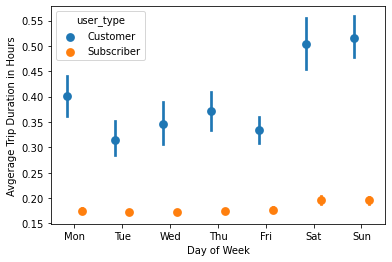

In [5]:
sb.pointplot(data=df, x='start_time_day_of_week', y='duration_hours', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('Avgerage Trip Duration in Hours');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!